# Author

Ronen H

# Import Libraries

In [1]:
import os
from document_preprocessor import NLPTokenizer
from indexing import BibleChapterIndex, create_bible_index
from ranker import RandomRanker, TFIDFRanker, BM25Ranker, DirichletLMRanker, BiEncoderRanker, CrossEncoderRanker
from relevance import Relevance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import orjson
from l2r import L2RRanker, L2RFeatureExtractor
from sentence_transformers import SentenceTransformer
import numpy as np

In [2]:
eval_ranker = Relevance()

In [3]:
train_queries_path = 'bible_queries_relevances/train_queries_relevances.csv'
test_queries_path = 'bible_queries_relevances/test_queries_relevances.csv'

# Create Bible Chapter Index

In [4]:
nlp_tokenizer = NLPTokenizer()

In [5]:
bible_chapter_index = None
if not os.path.isdir('bible_index'):
    bible_chapter_index = create_bible_index('bible_data/old_testament.jsonl', 'bible_data/new_testament.jsonl', nlp_tokenizer)
    bible_chapter_index.save('bible_index')
else:
    bible_chapter_index = BibleChapterIndex()
    bible_chapter_index.load('bible_index')

9949it [00:00, 122588.51it/s]
1189it [00:00, 80486.56it/s]
9949it [00:00, 484276.42it/s]
1189it [00:00, 19185.75it/s]

Loaded Bible Index from bible_index


# Evaluate Random Ranker

In [6]:
random_ranker = RandomRanker(bible_chapter_index, nlp_tokenizer)

In [7]:
random_ranker_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, random_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 173576.54it/s]


0.0

If God is merciful and kind, why do people still suffer in this world?


  0%|          | 0/1189 [00:00<?, ?it/s]

100%|██████████| 1189/1189 [00:00<?, ?it/s]


0.0

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 237794.56it/s]


0.0

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<?, ?it/s]


0.0

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 298642.28it/s]


0.0

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 92237.92it/s]


0.0

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<00:00, 396204.61it/s]


0.0

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 397657.88it/s]


0.0

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 132029.74it/s]


0.13333333333333333

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 401370.42it/s]

0.13333333333333333



In [8]:
random_ranker_eval_results

[('What did God do to unloyal servants?', 0.0),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.0),
 ('How do we get saved and know when we are saved?', 0.0),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.0),
 ('Who were the kings of Israel and were they faithful to God?', 0.0),
 ('What does God say about spirituality?', 0.0),
 ('Why did Jesus die on the cross?', 0.0),
 ('How do we face discrimination and injustice?', 0.0),
 ('Where do we find comfort and peace?', 0.13333333333333333),
 ('Who are the enemies of God?', 0.13333333333333333)]

# Evaluate TF-IDF Ranker

In [9]:
tf_idf_ranker = TFIDFRanker(bible_chapter_index, nlp_tokenizer)

In [10]:
tf_idf_ranker_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, tf_idf_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 293182.10it/s]

0.0

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 1189/1189 [00:00<00:00, 38030.01it/s]


0.06666666666666667

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 76422.51it/s]


0.0

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<?, ?it/s]


0.2

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 113947.53it/s]


0.26666666666666666

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 75943.04it/s]


0.2

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<?, ?it/s]


0.4666666666666667

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 331959.49it/s]


0.0

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 89358.84it/s]


0.13333333333333333

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 56479.51it/s]


0.0



In [11]:
tf_idf_ranker_eval_results

[('What did God do to unloyal servants?', 0.0),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.06666666666666667),
 ('How do we get saved and know when we are saved?', 0.0),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.2),
 ('Who were the kings of Israel and were they faithful to God?',
  0.26666666666666666),
 ('What does God say about spirituality?', 0.2),
 ('Why did Jesus die on the cross?', 0.4666666666666667),
 ('How do we face discrimination and injustice?', 0.0),
 ('Where do we find comfort and peace?', 0.13333333333333333),
 ('Who are the enemies of God?', 0.0)]

# Evaluate BM25 Ranker

In [12]:
bm25_ranker = BM25Ranker(bible_chapter_index, nlp_tokenizer)

In [13]:
bm25_ranker_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, bm25_ranker)

What did God do to unloyal servants?


100%|██████████| 1189/1189 [00:00<00:00, 35433.32it/s]

0.06666666666666667

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 1189/1189 [00:00<00:00, 29715.64it/s]


0.06666666666666667

How do we get saved and know when we are saved?


100%|██████████| 1189/1189 [00:00<00:00, 74613.65it/s]


0.06666666666666667

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 1189/1189 [00:00<00:00, 41706.97it/s]


0.0

Who were the kings of Israel and were they faithful to God?


100%|██████████| 1189/1189 [00:00<00:00, 38010.88it/s]


0.0

What does God say about spirituality?


100%|██████████| 1189/1189 [00:00<00:00, 75985.85it/s]


0.0

Why did Jesus die on the cross?


100%|██████████| 1189/1189 [00:00<00:00, 473287.22it/s]


0.3333333333333333

How do we face discrimination and injustice?


100%|██████████| 1189/1189 [00:00<00:00, 268552.91it/s]


0.0

Where do we find comfort and peace?


100%|██████████| 1189/1189 [00:00<00:00, 75975.43it/s]


0.13333333333333333

Who are the enemies of God?


100%|██████████| 1189/1189 [00:00<00:00, 75682.57it/s]


0.0



In [14]:
bm25_ranker_eval_results

[('What did God do to unloyal servants?', 0.06666666666666667),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.06666666666666667),
 ('How do we get saved and know when we are saved?', 0.06666666666666667),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.0),
 ('Who were the kings of Israel and were they faithful to God?', 0.0),
 ('What does God say about spirituality?', 0.0),
 ('Why did Jesus die on the cross?', 0.3333333333333333),
 ('How do we face discrimination and injustice?', 0.0),
 ('Where do we find comfort and peace?', 0.13333333333333333),
 ('Who are the enemies of God?', 0.0)]

# Evaluate L2R Ranker

In [15]:
dirichlet_lm_ranker = DirichletLMRanker(bible_chapter_index, nlp_tokenizer)

In [16]:
verses = {}
with open('bible_data/old_testament.jsonl', 'rb') as old_testament_file:
    for bible_chapter_line in tqdm(old_testament_file):
        bible_chapter = orjson.loads(bible_chapter_line)
        verses[bible_chapter['chapterid']] = [verse for verse in bible_chapter['verses'].values()]
with open('bible_data/new_testament.jsonl', 'rb') as new_testament_file:
    for bible_chapter_line in tqdm(new_testament_file):
        bible_chapter = orjson.loads(bible_chapter_line)
        verses[bible_chapter['chapterid']] = [verse for verse in bible_chapter['verses'].values()]

929it [00:00, 33630.02it/s]
260it [00:00, 15596.22it/s]


In [17]:
cross_encoder_ranker = CrossEncoderRanker('cross-encoder/msmarco-MiniLM-L6-en-de-v1', verses)

In [18]:
l2r_feature_extractor = L2RFeatureExtractor(bible_chapter_index, nlp_tokenizer, tf_idf_ranker, bm25_ranker, dirichlet_lm_ranker, cross_encoder_ranker)

In [19]:
encoded_chapters = None
chapter_ids = None
if not os.path.isfile('bible_data/encoded_chapters.npy'):
    bi_encoder_model = SentenceTransformer('msmarco-distilbert-dot-v5', device='cpu')
    chapter_ids = []
    chapter_texts = []
    with open('bible_data/old_testament.jsonl', 'rb') as old_testament_file:
        for bible_chapter_line in tqdm(old_testament_file):
            bible_chapter = orjson.loads(bible_chapter_line)
            chapter_ids.append(bible_chapter['chapterid'])
            chapter_texts.append(' '.join(bible_chapter['verses'].values()))
    with open('bible_data/new_testament.jsonl', 'rb') as new_testament_file:
        for bible_chapter_line in tqdm(new_testament_file):
            bible_chapter = orjson.loads(bible_chapter_line)
            chapter_ids.append(bible_chapter['chapterid'])
            chapter_texts.append(' '.join(bible_chapter['verses'].values()))
    encoded_chapters = bi_encoder_model.encode(chapter_texts, show_progress_bar=True)
    np.save('bible_data/encoded_chapters.npy', encoded_chapters)
    with open('bible_data/chapterids.json', 'xb') as chapterids_file:
        chapterids_file.write(orjson.dumps(chapter_ids))
else:
    encoded_chapters = np.load('bible_data/encoded_chapters.npy')
    with open('bible_data/chapterids.json', 'rb') as chapterids_file:
        chapter_ids = orjson.loads(chapterids_file.readline())
bi_encoder_ranker = BiEncoderRanker('msmarco-distilbert-dot-v5', encoded_chapters, chapter_ids)

## 5 Leaves

In [20]:
l2r_ranker_1 = L2RRanker(bible_chapter_index, nlp_tokenizer, bi_encoder_ranker, l2r_feature_extractor, {'num_leaves': 5})
l2r_ranker_1.train(train_queries_path)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [10:48<00:00, 64.89s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 6


In [21]:
l2r_ranker_1_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, l2r_ranker_1)

What did God do to unloyal servants?


100%|██████████| 100/100 [02:05<00:00,  1.25s/it]


0.06666666666666667

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


0.5333333333333333

How do we get saved and know when we are saved?


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


0.2

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 100/100 [02:00<00:00,  1.21s/it]


0.4

Who were the kings of Israel and were they faithful to God?


100%|██████████| 100/100 [02:15<00:00,  1.35s/it]


0.4

What does God say about spirituality?


100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


0.4

Why did Jesus die on the cross?


100%|██████████| 100/100 [02:15<00:00,  1.36s/it]


0.6

How do we face discrimination and injustice?


100%|██████████| 100/100 [01:43<00:00,  1.03s/it]


0.13333333333333333

Where do we find comfort and peace?


100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


0.2

Who are the enemies of God?


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


0.2



In [22]:
l2r_ranker_1_eval_results

[('What did God do to unloyal servants?', 0.06666666666666667),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.5333333333333333),
 ('How do we get saved and know when we are saved?', 0.2),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.4),
 ('Who were the kings of Israel and were they faithful to God?', 0.4),
 ('What does God say about spirituality?', 0.4),
 ('Why did Jesus die on the cross?', 0.6),
 ('How do we face discrimination and injustice?', 0.13333333333333333),
 ('Where do we find comfort and peace?', 0.2),
 ('Who are the enemies of God?', 0.2)]

## 10 Leaves

In [23]:
l2r_ranker_2 = L2RRanker(bible_chapter_index, nlp_tokenizer, bi_encoder_ranker, l2r_feature_extractor, {'num_leaves': 10})
l2r_ranker_2.train(train_queries_path)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [09:37<00:00, 57.72s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 6


In [24]:
l2r_ranker_2_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, l2r_ranker_2)

What did God do to unloyal servants?


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


0.4666666666666667

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


0.5333333333333333

How do we get saved and know when we are saved?


100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


0.13333333333333333

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]


0.3333333333333333

Who were the kings of Israel and were they faithful to God?


100%|██████████| 100/100 [02:12<00:00,  1.32s/it]


0.4

What does God say about spirituality?


100%|██████████| 100/100 [01:29<00:00,  1.11it/s]


0.3333333333333333

Why did Jesus die on the cross?


100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


0.6666666666666666

How do we face discrimination and injustice?


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


0.26666666666666666

Where do we find comfort and peace?


100%|██████████| 100/100 [01:46<00:00,  1.06s/it]


0.2

Who are the enemies of God?


100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


0.3333333333333333



In [25]:
l2r_ranker_2_eval_results

[('What did God do to unloyal servants?', 0.4666666666666667),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.5333333333333333),
 ('How do we get saved and know when we are saved?', 0.13333333333333333),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.3333333333333333),
 ('Who were the kings of Israel and were they faithful to God?', 0.4),
 ('What does God say about spirituality?', 0.3333333333333333),
 ('Why did Jesus die on the cross?', 0.6666666666666666),
 ('How do we face discrimination and injustice?', 0.26666666666666666),
 ('Where do we find comfort and peace?', 0.2),
 ('Who are the enemies of God?', 0.3333333333333333)]

## 15 Leaves

In [26]:
l2r_ranker_3 = L2RRanker(bible_chapter_index, nlp_tokenizer, bi_encoder_ranker, l2r_feature_extractor, {'num_leaves': 15})
l2r_ranker_3.train(train_queries_path)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [09:56<00:00, 59.64s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 6


In [27]:
l2r_ranker_3_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, l2r_ranker_3)

What did God do to unloyal servants?


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:55<00:00,  1.16s/it]


0.26666666666666666

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 100/100 [01:37<00:00,  1.03it/s]


0.4666666666666667

How do we get saved and know when we are saved?


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


0.2

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 100/100 [01:55<00:00,  1.16s/it]


0.26666666666666666

Who were the kings of Israel and were they faithful to God?


100%|██████████| 100/100 [02:12<00:00,  1.33s/it]


0.4

What does God say about spirituality?


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


0.3333333333333333

Why did Jesus die on the cross?


100%|██████████| 100/100 [02:14<00:00,  1.35s/it]


0.4666666666666667

How do we face discrimination and injustice?


100%|██████████| 100/100 [01:44<00:00,  1.05s/it]


0.2

Where do we find comfort and peace?


100%|██████████| 100/100 [01:18<00:00,  1.28it/s]


0.26666666666666666

Who are the enemies of God?


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


0.2



In [28]:
l2r_ranker_3_eval_results

[('What did God do to unloyal servants?', 0.26666666666666666),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.4666666666666667),
 ('How do we get saved and know when we are saved?', 0.2),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.26666666666666666),
 ('Who were the kings of Israel and were they faithful to God?', 0.4),
 ('What does God say about spirituality?', 0.3333333333333333),
 ('Why did Jesus die on the cross?', 0.4666666666666667),
 ('How do we face discrimination and injustice?', 0.2),
 ('Where do we find comfort and peace?', 0.26666666666666666),
 ('Who are the enemies of God?', 0.2)]

## 20 Leaves

In [29]:
l2r_ranker_4 = L2RRanker(bible_chapter_index, nlp_tokenizer, bi_encoder_ranker, l2r_feature_extractor, {'num_leaves': 20})
l2r_ranker_4.train(train_queries_path)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [09:56<00:00, 59.67s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 6


In [30]:
l2r_ranker_4_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, l2r_ranker_4)

What did God do to unloyal servants?


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


0.5333333333333333

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 100/100 [01:38<00:00,  1.01it/s]


0.4

How do we get saved and know when we are saved?


100%|██████████| 100/100 [01:46<00:00,  1.06s/it]


0.26666666666666666

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 100/100 [01:56<00:00,  1.16s/it]


0.26666666666666666

Who were the kings of Israel and were they faithful to God?


100%|██████████| 100/100 [02:16<00:00,  1.37s/it]


0.3333333333333333

What does God say about spirituality?


100%|██████████| 100/100 [01:31<00:00,  1.10it/s]


0.3333333333333333

Why did Jesus die on the cross?


100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


0.5333333333333333

How do we face discrimination and injustice?


100%|██████████| 100/100 [01:41<00:00,  1.01s/it]


0.26666666666666666

Where do we find comfort and peace?


100%|██████████| 100/100 [01:17<00:00,  1.29it/s]


0.2

Who are the enemies of God?


100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


0.2



In [31]:
l2r_ranker_4_eval_results

[('What did God do to unloyal servants?', 0.5333333333333333),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.4),
 ('How do we get saved and know when we are saved?', 0.26666666666666666),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.26666666666666666),
 ('Who were the kings of Israel and were they faithful to God?',
  0.3333333333333333),
 ('What does God say about spirituality?', 0.3333333333333333),
 ('Why did Jesus die on the cross?', 0.5333333333333333),
 ('How do we face discrimination and injustice?', 0.26666666666666666),
 ('Where do we find comfort and peace?', 0.2),
 ('Who are the enemies of God?', 0.2)]

## 25 Leaves

In [32]:
l2r_ranker_5 = L2RRanker(bible_chapter_index, nlp_tokenizer, bi_encoder_ranker, l2r_feature_extractor, {'num_leaves': 25})
l2r_ranker_5.train(train_queries_path)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [10:15<00:00, 61.60s/it]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 761
[LightGBM] [Info] Number of data points in the train set: 544, number of used features: 6
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [33]:
l2r_ranker_5_eval_results = eval_ranker.evaluate_ranker_results(test_queries_path, l2r_ranker_5)

What did God do to unloyal servants?


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:31<00:00,  1.52s/it]


0.3333333333333333

If God is merciful and kind, why do people still suffer in this world?


100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


0.6

How do we get saved and know when we are saved?


100%|██████████| 100/100 [01:45<00:00,  1.06s/it]


0.13333333333333333

Where does God show up in our lives if he is not bounded by this world?


100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


0.2

Who were the kings of Israel and were they faithful to God?


100%|██████████| 100/100 [02:25<00:00,  1.46s/it]


0.5333333333333333

What does God say about spirituality?


100%|██████████| 100/100 [01:33<00:00,  1.07it/s]


0.3333333333333333

Why did Jesus die on the cross?


100%|██████████| 100/100 [02:13<00:00,  1.33s/it]


0.5333333333333333

How do we face discrimination and injustice?


100%|██████████| 100/100 [01:43<00:00,  1.04s/it]


0.3333333333333333

Where do we find comfort and peace?


100%|██████████| 100/100 [01:20<00:00,  1.25it/s]


0.13333333333333333

Who are the enemies of God?


100%|██████████| 100/100 [01:24<00:00,  1.19it/s]


0.26666666666666666



In [34]:
l2r_ranker_5_eval_results

[('What did God do to unloyal servants?', 0.3333333333333333),
 ('If God is merciful and kind, why do people still suffer in this world?',
  0.6),
 ('How do we get saved and know when we are saved?', 0.13333333333333333),
 ('Where does God show up in our lives if he is not bounded by this world?',
  0.2),
 ('Who were the kings of Israel and were they faithful to God?',
  0.5333333333333333),
 ('What does God say about spirituality?', 0.3333333333333333),
 ('Why did Jesus die on the cross?', 0.5333333333333333),
 ('How do we face discrimination and injustice?', 0.3333333333333333),
 ('Where do we find comfort and peace?', 0.13333333333333333),
 ('Who are the enemies of God?', 0.26666666666666666)]

# Plot Ranker Results

In [35]:
rankers = ['Random'] * len(random_ranker_eval_results) + ['TF-IDF'] * len(tf_idf_ranker_eval_results) + \
    ['BM25'] * len(bm25_ranker_eval_results) + ['L2R (num_leaves 5)'] * len(l2r_ranker_1_eval_results) + \
    ['L2R (num_leaves 10)'] * len(l2r_ranker_2_eval_results) + ['L2R (num_leaves 15)'] * len(l2r_ranker_3_eval_results) + \
    ['L2R (num_leaves 20)'] * len(l2r_ranker_4_eval_results) + ['L2R (num_leaves 25)'] * len(l2r_ranker_5_eval_results)
ranker_types = ['Baseline'] * (len(random_ranker_eval_results) + len(tf_idf_ranker_eval_results) + len(bm25_ranker_eval_results)) + \
    ['Bible Search Engine'] * (len(l2r_ranker_1_eval_results) + len(l2r_ranker_2_eval_results) + len(l2r_ranker_3_eval_results) + len(l2r_ranker_4_eval_results) + len(l2r_ranker_5_eval_results))
precisions = [precision for _, precision in random_ranker_eval_results] + [precision for _, precision in tf_idf_ranker_eval_results] + \
    [precision for _, precision in bm25_ranker_eval_results] + [precision for _, precision in l2r_ranker_1_eval_results] + \
    [precision for _, precision in l2r_ranker_2_eval_results] + [precision for _, precision in l2r_ranker_3_eval_results] + \
    [precision for _, precision in l2r_ranker_4_eval_results] + [precision for _, precision in l2r_ranker_5_eval_results]
queries = [query for query, _ in random_ranker_eval_results] * 8

if not os.path.isdir('rankers'):
    os.mkdir('rankers')
rankers_results = pd.DataFrame({'Ranker': rankers, 'Ranker Type': ranker_types, 'Precision at 15': precisions, 'Query': queries})
rankers_results.to_csv('rankers/results.csv', index=None)
rankers_results

,Ranker,Ranker Type,Precision at 15,Query
0,Random,Baseline,0.000000,What did God do to unloyal servants?
1,Random,Baseline,0.000000,"If God is merciful and kind, why do people sti..."
2,Random,Baseline,0.000000,How do we get saved and know when we are saved?
3,Random,Baseline,0.000000,Where does God show up in our lives if he is n...
4,Random,Baseline,0.000000,Who were the kings of Israel and were they fai...
...,...,...,...,...
75,L2R (num_leaves 25),Bible Search Engine,0.333333,What does God say about spirituality?
76,L2R (num_leaves 25),Bible Search Engine,0.533333,Why did Jesus die on the cross?
77,L2R (num_leaves 25),Bible Search Engine,0.333333,How do we face discrimination and injustice?
78,L2R (num_leaves 25),Bible Search Engine,0.133333,Where do we find comfort and peace?


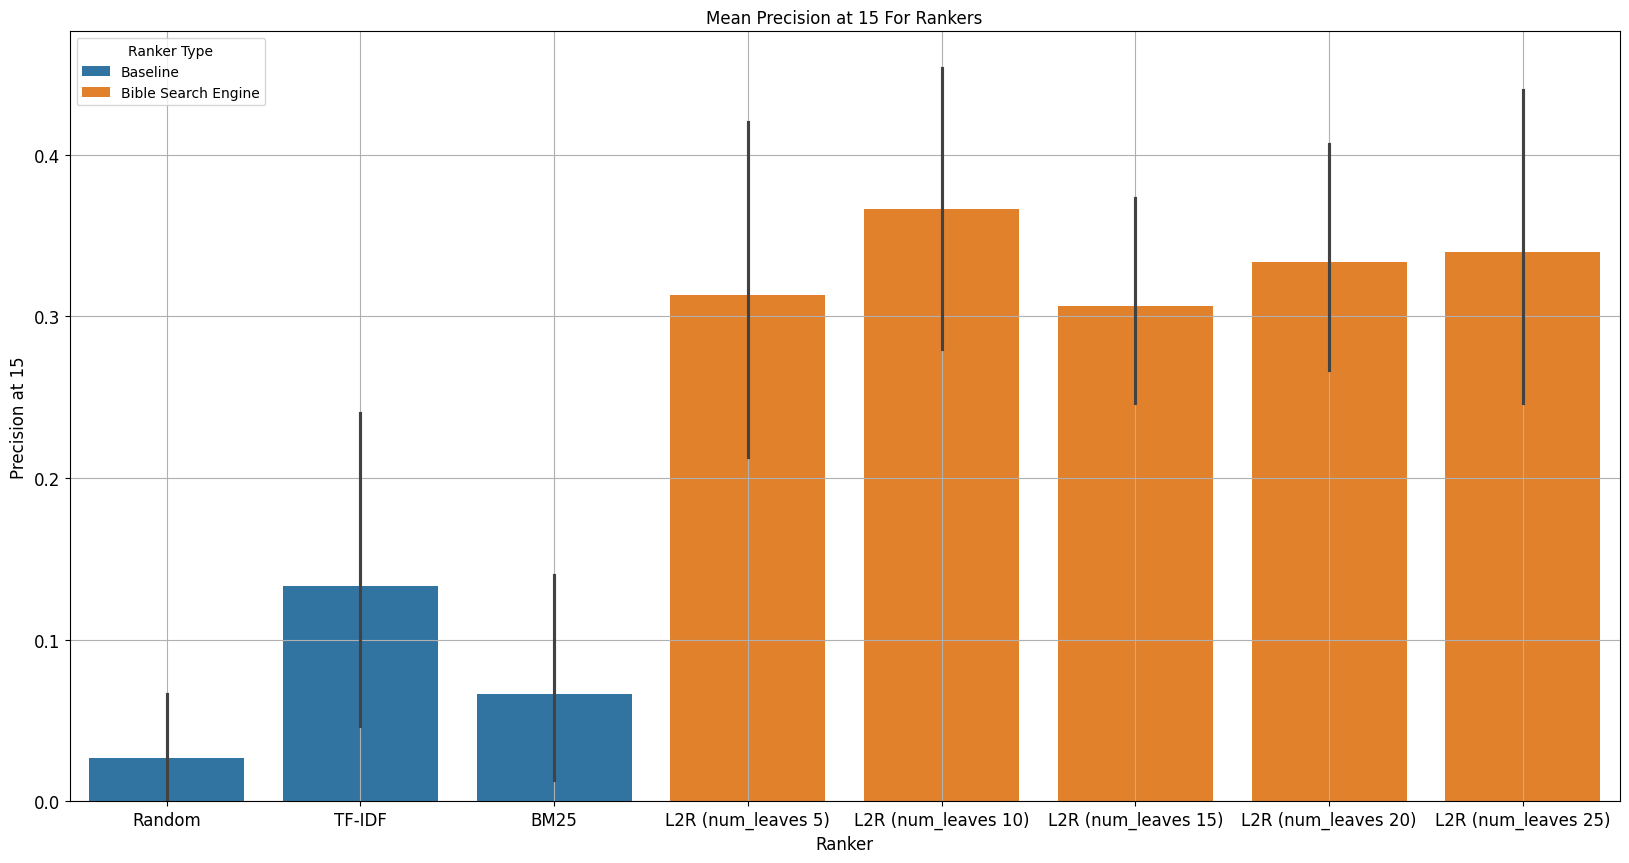

In [36]:
fig, ax = plt.subplots(figsize=(20, 10))
ranker_results_plot = sns.barplot(rankers_results, x='Ranker', y='Precision at 15', hue='Ranker Type')
plt.title('Mean Precision at 15 For Rankers', fontsize='large')
sns.move_legend(ranker_results_plot, 'upper left')
plt.xlabel('Ranker', fontsize='large')
plt.ylabel('Precision at 15', fontsize='large')
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')
ax.grid()
plt.savefig('rankers/results.jpg', dpi=500, bbox_inches='tight')
plt.show()